# Lets Grow More


# Task-Prediction using Decision Tree Algorithm





# by-Param Madan

importing the libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

importing the dataset

In [21]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [23]:

dataset.shape

(150, 6)

In [24]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

finding the pairwise correlation of all columns in the dataframe

In [25]:
dataset.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


visualizing the value of the matrix using seaborn

<AxesSubplot:>

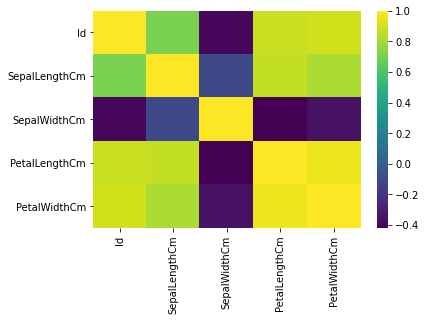

In [26]:
sns.heatmap(dataset.corr() , cmap = "viridis")

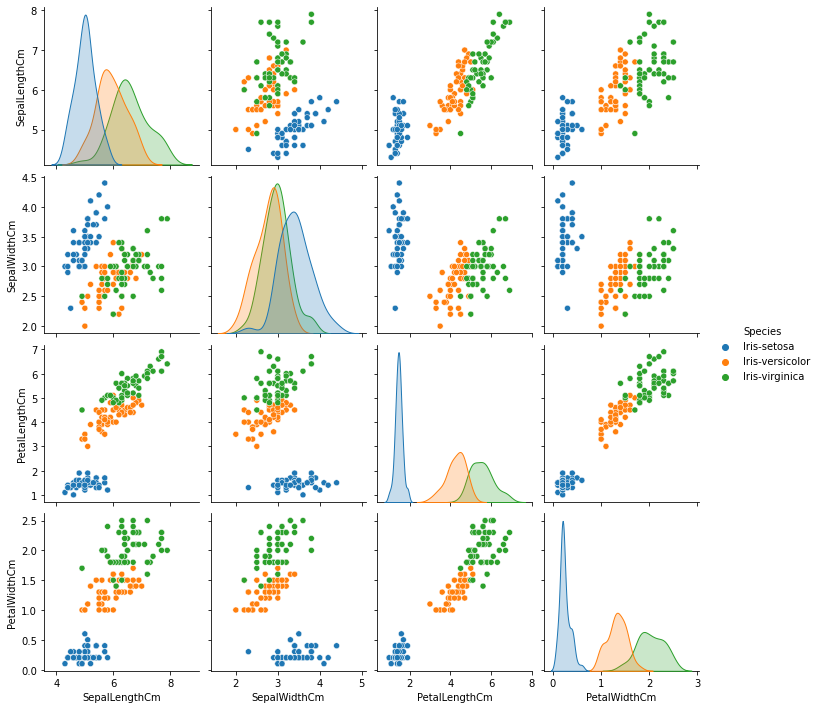

In [27]:
sns.pairplot(dataset, hue = 'Species', vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

<AxesSubplot:>

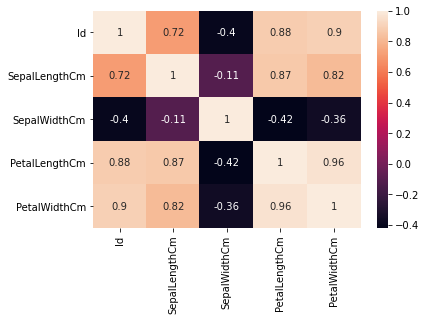

In [28]:
sns.heatmap(dataset.corr(),annot=True)

plotting the categorical variable

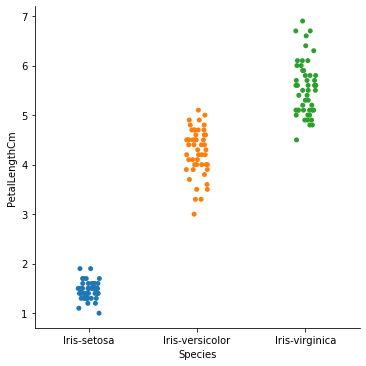

In [32]:
sns.catplot(x ='Species',y ='PetalLengthCm', data = dataset)

In [34]:

x = dataset.iloc[:,[1,2,3,4]].values
y = dataset.iloc[:,-1].values

In [36]:

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
y_new = ohe.fit_transform(dataset[['Species']])

In [37]:

y_new

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [38]:
df = pd.DataFrame(y_new)
df.rename(columns={0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}, inplace=True)
df.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [40]:

result = pd.concat([dataset,df] ,axis = 1)
result.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0


In [41]:
result

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.0,0.0,0.0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.0,0.0,0.0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.0,0.0,0.0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.0,0.0,0.0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0.0,0.0,1.0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0.0,0.0,1.0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0.0,0.0,1.0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0.0,0.0,1.0


In [42]:
new_x = result.iloc[:,[1,2,3,4]].values
new_y = result.iloc[:,[5,6,7]].values

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [44]:
train_x,test_x,train_y,test_y = train_test_split(new_x ,new_y ,test_size = 0.2 ,random_state = 1)

In [45]:
print("Shape of train_x is {}".format(train_x.shape))
print("Shape of train_y is {}".format(train_y.shape))
print("Shape of test_x is  {}".format(test_x.shape))
print("Shape of test_y is  {}".format(test_y.shape))

Shape of train_x is (120, 4)
Shape of train_y is (120, 3)
Shape of test_x is  (30, 4)
Shape of test_y is  (30, 3)


In [46]:
pip install dtc

Note: you may need to restart the kernel to use updated packages.


In [48]:
data = dataset.copy()
x = dataset.iloc[:,1:4]
y = dataset.iloc[:,-1]

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43)

In [49]:
print(x_train.shape)


(112, 3)


In [50]:
print(y_train.shape)

(112,)


In [51]:
print(y_test.shape)

(38,)


In [52]:
print(x_test.shape)

(38, 3)


In [53]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [54]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.79      0.92      0.85        12
 Iris-virginica       0.90      0.75      0.82        12

       accuracy                           0.89        38
      macro avg       0.90      0.89      0.89        38
   weighted avg       0.90      0.89      0.89        38



In [55]:
print("Training Score: ",clf.score(x_train,y_train))

Training Score:  1.0


In [56]:
print(accuracy_score(y_test,y_pred))

0.8947368421052632


In [57]:
print(confusion_matrix(y_test,y_pred))

[[14  0  0]
 [ 0 11  1]
 [ 0  3  9]]


In [58]:
data = {'y_Actual': y_test,
        'y_Predicted': y_pred
        }

df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()

,y_Actual,y_Predicted
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-virginica,Iris-virginica


In [59]:
pip install clf

Note: you may need to restart the kernel to use updated packages.


In [60]:
pred=clf.predict(x_test)  # To make predictions on the test dataset
print(pred)

['Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica']


In [61]:
print(clf.score(x_test,y_test))

0.8947368421052632


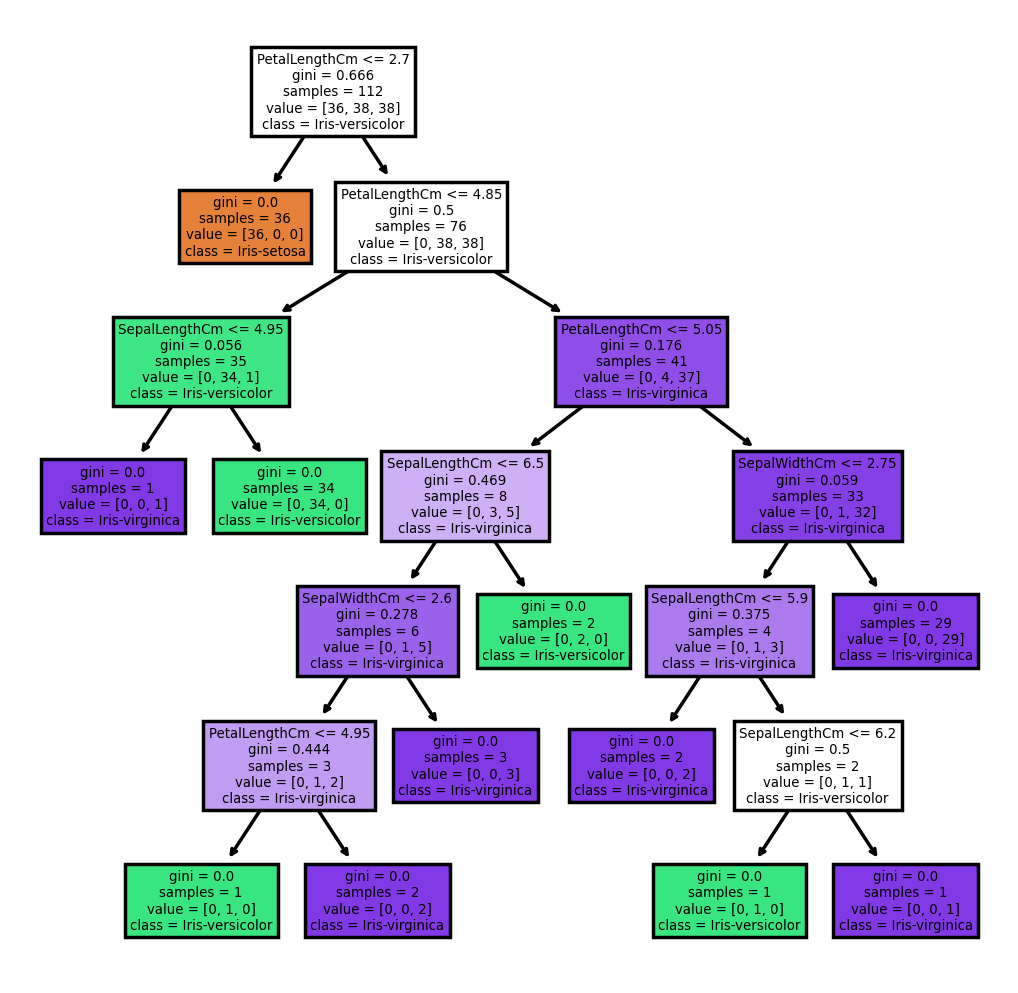

In [62]:
from sklearn import tree
feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250,facecolor='white')
tree.plot_tree(clf,feature_names=feature_names,class_names=class_names,filled=True);
fig.savefig('IrisTree.png')